In [1]:
import math
import meep as mp
from meep import mpb

num_bands = 8
resolution = 32
geometry_lattice = mp.Lattice(size=mp.Vector3(1, 1),
                              basis1=mp.Vector3(math.sqrt(3) / 2, 0.5),
                              basis2=mp.Vector3(math.sqrt(3) / 2, -0.5))
geometry = [mp.Cylinder(0.2, material=mp.Medium(epsilon=12))]
k_points = [
    mp.Vector3(),               # Gamma
    mp.Vector3(y=0.5),          # M
    mp.Vector3(1 / -3, 1 / 3),  # K
    mp.Vector3(),               # Gamma
]
k_points = mp.interpolate(4, k_points)

ms = mpb.ModeSolver(
    geometry=geometry,
    geometry_lattice=geometry_lattice,
    k_points=k_points,
    resolution=resolution,
    num_bands=num_bands
)
ms.run_tm(mpb.output_at_kpoint(mp.Vector3(1 / -3, 1 / 3), mpb.fix_efield_phase,
          mpb.output_efield_z))
tm_freqs = ms.all_freqs
tm_gaps = ms.gap_list
ms.run_te()
te_freqs = ms.all_freqs
te_gaps = ms.gap_list

Initializing eigensolver data
Computing 8 bands with 1e-07 tolerance
16 k-points
  Vector3<0.0, 0.0, 0.0>
  Vector3<0.0, 0.1, 0.0>
  Vector3<0.0, 0.2, 0.0>
  Vector3<0.0, 0.30000000000000004, 0.0>
  Vector3<0.0, 0.4, 0.0>
  Vector3<0.0, 0.5, 0.0>
  Vector3<-0.06666666666666667, 0.4666666666666667, 0.0>
  Vector3<-0.13333333333333333, 0.43333333333333335, 0.0>
  Vector3<-0.2, 0.39999999999999997, 0.0>
  Vector3<-0.26666666666666666, 0.36666666666666664, 0.0>
  Vector3<-0.3333333333333333, 0.3333333333333333, 0.0>
  Vector3<-0.26666666666666666, 0.26666666666666666, 0.0>
  Vector3<-0.19999999999999998, 0.19999999999999998, 0.0>
  Vector3<-0.1333333333333333, 0.1333333333333333, 0.0>
  Vector3<-0.06666666666666665, 0.06666666666666665, 0.0>
  Vector3<0.0, 0.0, 0.0>
elapsed time for initialization: 0.004124641418457031
Outputting epsilon.h5...
elapsed time for k point: 0.09382939338684082
elapsed time for k point: 0.05579042434692383
elapsed time for k point: 0.06534004211425781
elapsed ti

In [2]:
print('TM gaps')
for gap in tm_gaps:
    print(gap)
print('TE gaps')
for gap in te_gaps:
    print(gap)

TM gaps
(47.39883483253789, 0.2746902260167482, 0.4453310810690987)
(5.6740639480231065, 0.5605607990535272, 0.5932960878698785)
(0.014223870207005853, 0.7907195975678281, 0.7908320764965159)
(0.017161966966868752, 0.8374511179880573, 0.8375948534062025)
(0.22277612770986174, 0.8672009266363844, 0.8691349976044138)
TE gaps
(0.007916179285617626, 0.5631059454933676, 0.5631505237340275)
(5.190482251642612, 0.8214230165372104, 0.8651948161669857)


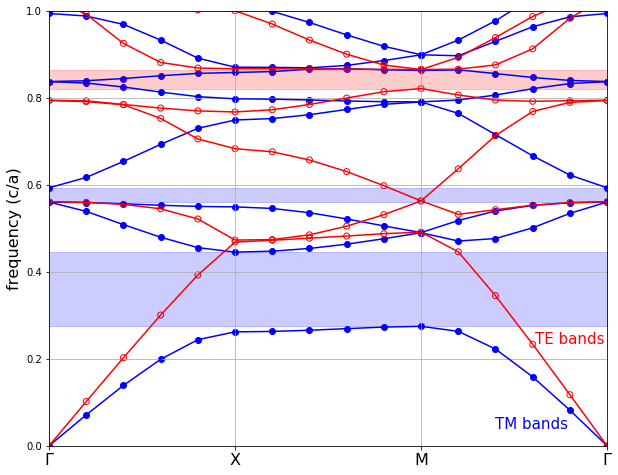

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(10,8))
x = range(len(tm_freqs))
# Plot bands
# Scatter plot for multiple y values, see https://stackoverflow.com/a/34280815/2261298
for xz, tmz, tez in zip(x, tm_freqs, te_freqs):
    ax.scatter([xz]*len(tmz), tmz, color='blue')
    ax.scatter([xz]*len(tez), tez, color='red', facecolors='none')
ax.plot(tm_freqs, color='blue')
ax.plot(te_freqs, color='red')
ax.set_ylim([0, 1])
ax.set_xlim([x[0], x[-1]])

# Plot gaps
for gap in tm_gaps:
    if gap[0] > 1:
        ax.fill_between(x, gap[1], gap[2], color='blue', alpha=0.2)

for gap in te_gaps:
    if gap[0] > 1:
        ax.fill_between(x, gap[1], gap[2], color='red', alpha=0.2)


# Plot labels
ax.text(12, 0.04, 'TM bands', color='blue', size=15)
ax.text(13.05, 0.235, 'TE bands', color='red', size=15)
        
points_in_between = (len(tm_freqs) - 4) / 3
tick_locs = [i*points_in_between+i for i in range(4)]
tick_labs = ['Γ', 'X', 'M', 'Γ']
ax.set_xticks(tick_locs)
ax.set_xticklabels(tick_labs, size=16)
ax.set_ylabel('frequency (c/a)', size=16)
ax.grid(True)

#fig.savefig('tri-rods-bands.gif')
#plt.show()

In [5]:
te_freqs

array([[0.        , 0.56122868, 0.79392895, 0.79465884, 1.03341305,
        1.0334231 , 1.11596707, 1.11681108],
       [0.10186545, 0.55980488, 0.7914598 , 0.79325781, 0.99212584,
        1.0284481 , 1.09798768, 1.11509623],
       [0.2026617 , 0.55513296, 0.78426545, 0.78493177, 0.92532786,
        1.01803714, 1.06979283, 1.11297591],
       [0.30075563, 0.54500319, 0.75283567, 0.7766037 , 0.88152751,
        1.00851179, 1.04494018, 1.11169802],
       [0.39275648, 0.52157674, 0.70557127, 0.77010985, 0.8686497 ,
        1.0025144 , 1.02766389, 1.11107007],
       [0.46842838, 0.47307224, 0.68322508, 0.76766148, 0.86698733,
        1.00051654, 1.02136772, 1.11088069],
       [0.47265399, 0.4741968 , 0.67604016, 0.77269512, 0.86687897,
        0.96981271, 1.05066191, 1.11080832],
       [0.47743248, 0.48508093, 0.65726584, 0.78480239, 0.86657691,
        0.93293272, 1.08111767, 1.11058686],
       [0.4823197 , 0.50500991, 0.6305842 , 0.79974512, 0.86612592,
        0.90046485, 1.099358

In [18]:
ms.gap_list

[(0.007916179281161635, 0.5631059454934042, 0.5631505237340391),
 (5.190482251647822, 0.8214230165371806, 0.8651948161669994)]